In [1]:
#importing libraries
import numpy as np
import sklearn as sk
import os
import time
import random as rn
import torch
import scipy as sp
from sklearn.preprocessing import StandardScaler
import h5py
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import torch.nn as nn
import pandas as pd
from torchvision import transforms
import snntorch as snn
from snntorch import utils
from torch.utils.data import DataLoader
from snntorch import spikegen
import torch.optim as optim

In [2]:
# Parameters
num_samples = 1000  # Number of time steps
num_channels = 8  # Number of EMG channels
hidden_size = 50  # Number of neurons in the hidden layer
num_classes = 2  # Number of output classes

# Read the CSV file
data_frame = pd.read_csv('/home/saqib/projects/neuromorphicComputing/neuromorphicComputing/spiking_data_class1.csv')

# Convert the DataFrame to a tensor
class1_data = torch.tensor(data_frame.values, dtype=torch.float32)


# Read the CSV file
data_frame = pd.read_csv('/home/saqib/projects/neuromorphicComputing/neuromorphicComputing/spiking_data_class2.csv')

# Convert the DataFrame to a tensor
class2_data = torch.tensor(data_frame.values, dtype=torch.float32)

# Assign labels to each class
class1_labels = torch.zeros(500, dtype=torch.long)
class2_labels = torch.ones(500, dtype=torch.long)


# Concatenate the data and labels
data = torch.cat((class1_data, class2_data), dim=0)
labels = torch.cat((class1_labels, class2_labels), dim=0)

# Reshape the data for PyTorch compatibility
data = data.unsqueeze(dim=1).view(-1, num_channels)

# Define the SNN model using PyTorch
class SNN(nn.Module):
    def __init__(self, num_channels, hidden_size):
        super(SNN, self).__init__()
        self.input_layer = nn.Linear(num_channels, hidden_size)
        self.output_layer = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = self.input_layer(x)
        x = torch.relu(x)
        x = self.output_layer(x)
        return x

# Instantiate the SNN model
snn = SNN(num_channels, hidden_size)

# Define the loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(snn.parameters(), lr=0.001)

epochs_list=[10,50,100,300,500,700,1000,1500,2000,3000,4000,5000,6000,7000,8000,9000,10000]
losses_list=[]

In [19]:
# Training loop
num_epochs = 10000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = snn(data)
    loss = loss_fn(outputs, labels)
    loss.backward()
    optimizer.step()

    # STDP-like weight updates
    for name, param in snn.named_parameters():
        if 'weight' in name:
            param.data.clamp_min_(0)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# # Testing
# test_outputs = snn(data)
# _, predicted = torch.max(test_outputs.data, 1)

# # Print the predicted labels
# print("Predicted Labels:")
# print(predicted)
losses_list.append(loss.item())

Epoch [10/10000], Loss: 0.3571
Epoch [20/10000], Loss: 0.3571
Epoch [30/10000], Loss: 0.3571
Epoch [40/10000], Loss: 0.3571
Epoch [50/10000], Loss: 0.3571
Epoch [60/10000], Loss: 0.3571
Epoch [70/10000], Loss: 0.3571
Epoch [80/10000], Loss: 0.3571
Epoch [90/10000], Loss: 0.3571
Epoch [100/10000], Loss: 0.3571
Epoch [110/10000], Loss: 0.3571
Epoch [120/10000], Loss: 0.3571
Epoch [130/10000], Loss: 0.3571
Epoch [140/10000], Loss: 0.3571
Epoch [150/10000], Loss: 0.3571
Epoch [160/10000], Loss: 0.3571
Epoch [170/10000], Loss: 0.3571
Epoch [180/10000], Loss: 0.3571
Epoch [190/10000], Loss: 0.3571
Epoch [200/10000], Loss: 0.3571
Epoch [210/10000], Loss: 0.3571
Epoch [220/10000], Loss: 0.3571
Epoch [230/10000], Loss: 0.3571
Epoch [240/10000], Loss: 0.3571
Epoch [250/10000], Loss: 0.3571
Epoch [260/10000], Loss: 0.3571
Epoch [270/10000], Loss: 0.3571
Epoch [280/10000], Loss: 0.3571
Epoch [290/10000], Loss: 0.3571
Epoch [300/10000], Loss: 0.3571
Epoch [310/10000], Loss: 0.3571
Epoch [320/10000]

Epoch [2550/10000], Loss: 0.3571
Epoch [2560/10000], Loss: 0.3571
Epoch [2570/10000], Loss: 0.3571
Epoch [2580/10000], Loss: 0.3571
Epoch [2590/10000], Loss: 0.3571
Epoch [2600/10000], Loss: 0.3571
Epoch [2610/10000], Loss: 0.3571
Epoch [2620/10000], Loss: 0.3571
Epoch [2630/10000], Loss: 0.3571
Epoch [2640/10000], Loss: 0.3571
Epoch [2650/10000], Loss: 0.3571
Epoch [2660/10000], Loss: 0.3571
Epoch [2670/10000], Loss: 0.3571
Epoch [2680/10000], Loss: 0.3571
Epoch [2690/10000], Loss: 0.3571
Epoch [2700/10000], Loss: 0.3571
Epoch [2710/10000], Loss: 0.3571
Epoch [2720/10000], Loss: 0.3571
Epoch [2730/10000], Loss: 0.3571
Epoch [2740/10000], Loss: 0.3571
Epoch [2750/10000], Loss: 0.3571
Epoch [2760/10000], Loss: 0.3571
Epoch [2770/10000], Loss: 0.3571
Epoch [2780/10000], Loss: 0.3571
Epoch [2790/10000], Loss: 0.3571
Epoch [2800/10000], Loss: 0.3571
Epoch [2810/10000], Loss: 0.3571
Epoch [2820/10000], Loss: 0.3571
Epoch [2830/10000], Loss: 0.3571
Epoch [2840/10000], Loss: 0.3571
Epoch [285

Epoch [5050/10000], Loss: 0.3571
Epoch [5060/10000], Loss: 0.3571
Epoch [5070/10000], Loss: 0.3571
Epoch [5080/10000], Loss: 0.3571
Epoch [5090/10000], Loss: 0.3571
Epoch [5100/10000], Loss: 0.3571
Epoch [5110/10000], Loss: 0.3571
Epoch [5120/10000], Loss: 0.3571
Epoch [5130/10000], Loss: 0.3571
Epoch [5140/10000], Loss: 0.3571
Epoch [5150/10000], Loss: 0.3571
Epoch [5160/10000], Loss: 0.3571
Epoch [5170/10000], Loss: 0.3571
Epoch [5180/10000], Loss: 0.3571
Epoch [5190/10000], Loss: 0.3571
Epoch [5200/10000], Loss: 0.3571
Epoch [5210/10000], Loss: 0.3571
Epoch [5220/10000], Loss: 0.3571
Epoch [5230/10000], Loss: 0.3571
Epoch [5240/10000], Loss: 0.3571
Epoch [5250/10000], Loss: 0.3571
Epoch [5260/10000], Loss: 0.3571
Epoch [5270/10000], Loss: 0.3571
Epoch [5280/10000], Loss: 0.3571
Epoch [5290/10000], Loss: 0.3571
Epoch [5300/10000], Loss: 0.3571
Epoch [5310/10000], Loss: 0.3571
Epoch [5320/10000], Loss: 0.3571
Epoch [5330/10000], Loss: 0.3571
Epoch [5340/10000], Loss: 0.3571
Epoch [535

Epoch [7570/10000], Loss: 0.3571
Epoch [7580/10000], Loss: 0.3571
Epoch [7590/10000], Loss: 0.3571
Epoch [7600/10000], Loss: 0.3571
Epoch [7610/10000], Loss: 0.3571
Epoch [7620/10000], Loss: 0.3571
Epoch [7630/10000], Loss: 0.3571
Epoch [7640/10000], Loss: 0.3571
Epoch [7650/10000], Loss: 0.3571
Epoch [7660/10000], Loss: 0.3571
Epoch [7670/10000], Loss: 0.3571
Epoch [7680/10000], Loss: 0.3571
Epoch [7690/10000], Loss: 0.3571
Epoch [7700/10000], Loss: 0.3571
Epoch [7710/10000], Loss: 0.3571
Epoch [7720/10000], Loss: 0.3571
Epoch [7730/10000], Loss: 0.3571
Epoch [7740/10000], Loss: 0.3571
Epoch [7750/10000], Loss: 0.3571
Epoch [7760/10000], Loss: 0.3571
Epoch [7770/10000], Loss: 0.3571
Epoch [7780/10000], Loss: 0.3571
Epoch [7790/10000], Loss: 0.3571
Epoch [7800/10000], Loss: 0.3571
Epoch [7810/10000], Loss: 0.3571
Epoch [7820/10000], Loss: 0.3571
Epoch [7830/10000], Loss: 0.3571
Epoch [7840/10000], Loss: 0.3571
Epoch [7850/10000], Loss: 0.3571
Epoch [7860/10000], Loss: 0.3571
Epoch [787

Text(0, 0.5, 'loss')

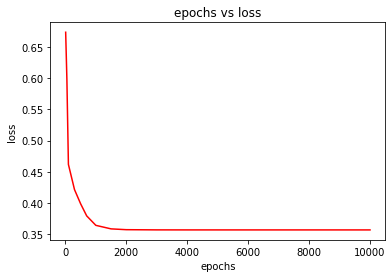

In [20]:
plt.plot(epochs_list,losses_list,color='r')
plt.title('epochs vs loss')
plt.xlabel('epochs')
plt.ylabel('loss')

In [21]:
print(losses_list)

[0.6731219291687012, 0.597905158996582, 0.46181172132492065, 0.4215273857116699, 0.39892521500587463, 0.379494845867157, 0.36438193917274475, 0.3587282598018646, 0.35743817687034607, 0.3571256101131439, 0.3570747971534729, 0.35706761479377747, 0.35706621408462524, 0.35706624388694763, 0.357065349817276, 0.3570650517940521, 0.3570646643638611]


In [22]:
losses_list_snn=[0.6731219291687012, 0.597905158996582, 0.46181172132492065, 0.4215273857116699, 0.39892521500587463, 0.379494845867157, 0.36438193917274475, 0.3587282598018646, 0.35743817687034607, 0.3571256101131439, 0.3570747971534729, 0.35706761479377747, 0.35706621408462524, 0.35706624388694763, 0.357065349817276, 0.3570650517940521, 0.3570646643638611]

In [23]:
losses_list_rnn=[0.693205714225769, 0.6931171417236328, 0.6930366158485413, 0.6916710734367371, 0.6805242300033569, 0.6656092405319214, 0.65693598985672, 0.6505345106124878, 0.6489424705505371, 0.6485673189163208, 0.648534893989563, 0.6485234498977661, 0.6484548449516296, 0.6479994654655457, 0.6460892558097839, 0.6414579153060913, 0.6321865320205688]

In [24]:
# Save the trained model
torch.save(snn.state_dict(), 'trained_model_snn.pth')

In [30]:
# # Load the saved model
# loaded_model = SNN(num_channels, hidden_size)
# loaded_model.load_state_dict(torch.load('trained_model_snn.pth'))

#### Comparision of RNN vs SNN performance

Text(0, 0.5, 'loss')

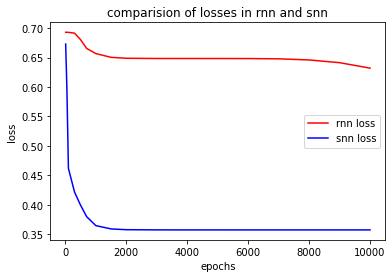

In [31]:
plt.plot(epochs_list,losses_list_rnn,color='r', label='rnn loss')
plt.plot(epochs_list,losses_list_snn,color='b', label='snn loss')
plt.legend()
plt.title('comparision of losses in rnn and snn')
plt.xlabel('epochs')
plt.ylabel('loss')